#Tarefa: Clustering

### Nesta tarefa, você deve carregar um dataset, agrupar os objetos utilizando algorimos de pelo menos 2 categorias diferentes (baseado em centroide, hierárquico, baseado em densidade) com diferentes parâmetros, guardar os clusters atribuídos em cada execução, avaliar a qualidade dos clusters de cada execução utilizando as métricas de qualidade vistas em aula, e observar insigths com base nas visualizações dos agrupamentos encontrados.

### A cada algoritmo escolhido:
* execute 6 cenários variando algum parâmetro
* apresente graficamente os resultados do melhor cenário

### No caso dos algoritmos k-means & k-medoids apresente o gráfico dos métodos do cotovelo e silhoueta para determinar o melhor número de clusters a ser implementado.









# Carregue as bibliotecas

Dica: Para toda a tarefa, além da biblioteca pandas e matplotlib, você pode querer explorar funções da biblioteca de código aberto sklearn e sklearn_extra, em particular os pacotes:
- cluster (KMeans, KMedoids, AgglomerativeClustering, DBSCAN)
- preprocessing e a técnica de normalização Min-max (MinMaxScaler) e Binarização (OneHotEncoding)
- metrics (silhouette_score, davies_bouldin_score)

Além de outros pacotes que você desejar experimentar.

In [32]:
pip install scikit-learn-extra

In [33]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn_extra.cluster import KMedoids


### Importe o arquivo e carregue os dados

In [34]:
df = pd.read_csv("Mall_Customers.csv",delimiter=",")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Pré-processamento #1 - convertendo tipos de dados

Verifique os tipos dos atributos do dataset, e realize as conversões de tipos necessárias para que seja possível calcular a distância entre os objetos:
* atributos categóricos binários devem ser convertidos para 0 ou 1 (binarizados)
* atributos categóricos com n (n > 2) valores COM ordem inerente ao domínio devem ser convertidos para valores inteiros, no intervalo [1..n]
* atributos categóricos com n (n > 2) valores SEM ordem inerente ao domínio devem ser binarizados

Dica: você pode querer investigar a função get_dummies() do pacote pandas

In [35]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [36]:
df = df.replace({True: 1, False: 0})
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


### Pré-processamento #2 - transformação de dados

Verifique os dados do dataset e avalie as transformações necessárias
(discretização, seleção de dados, padronização/normalização, ...).
Para cada transformação realizada, justifique-a (pode deixar como comentário no código com as suas justificativas).

In [37]:
#realizar a discretização da coluna age para ficar mais fácil interpretar os resultados

bins = [0, 25, 60, 100]
labels = ['Jovem', 'Adulto', 'Terceira idade']
df['Faixa Etária'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Faixa Etária
0,1,19,15,39,1,Jovem
1,2,21,15,81,1,Jovem
2,3,20,16,6,0,Jovem
3,4,23,16,77,0,Jovem
4,5,31,17,40,0,Adulto


In [38]:
# verificação se há dados faltantes para retirá-los caso existam

missing_values = df.isnull().sum()

print("Valores ausentes em cada coluna:")
print(missing_values)

Valores ausentes em cada coluna:
CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Male               0
Faixa Etária              0
dtype: int64


In [39]:
# realizar a normalização de spending score, age e de anual income, pois assim é reduzido o viés por conta de escalas diferentes em cada coluna, o que preserva a distribuição relativa dos dados.

scaler = MinMaxScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])

print(df)

     CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0             1  0.019231            0.000000                0.387755   
1             2  0.057692            0.000000                0.816327   
2             3  0.038462            0.008197                0.051020   
3             4  0.096154            0.008197                0.775510   
4             5  0.250000            0.016393                0.397959   
..          ...       ...                 ...                     ...   
195         196  0.326923            0.860656                0.795918   
196         197  0.519231            0.909836                0.275510   
197         198  0.269231            0.909836                0.744898   
198         199  0.269231            1.000000                0.173469   
199         200  0.230769            1.000000                0.836735   

     Gender_Male Faixa Etária  
0              1        Jovem  
1              1        Jovem  
2              0        Jov

### Clustering

Escolha 2 algoritmos de clustering, um de cada tipo.

Para cada algoritmo, execute-o em 6 cenários, variando seus parâmetros. Atente-se para os parâmetros que possam ser mais relevantes para cada algoritmo.

Calcule o Coeficiente de Silhouete e o Índice Davies-Bouldin para cada cenário, e depois compare as execuções.

Para os algoritmos baseados em centroides, determine o número de clusters utilizando o método do cotovelo (Dica: você pode querer investigar o atributo inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Cenário 1: Silhueta = 0.3652498066402899, Índice Davies-Bouldin = 1.1485007396260138, número de cluster = 2
Cenário 2: Silhueta = 0.36146237345652027, Índice Davies-Bouldin = 1.0773191652511607, número de cluster = 3
Cenário 3: Silhueta = 0.392319202055722, Índice Davies-Bouldin = 0.9706494236068243, número de cluster = 4
Cenário 4: Silhueta = 0.40611743307078185, Índice Davies-Bouldin = 0.8795479778890574, número de cluster = 5
Cenário 5: Silhueta = 0.4234860620777653, Índice Davies-Bouldin = 0.8558114624377867, número de cluster = 6
Cenário 6: Silhueta = 0.4080176075833593, Índice Davies-Bouldin = 0.9326678900559079, número de cluster = 7
Melhor número de clusters para KMeans: 6


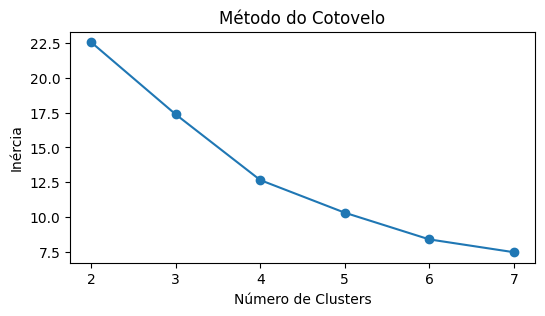

In [48]:

# Inicialização das listas para armazenar os resultados
silhouette_scores = []
davies_bouldin_scores = []
inertia_values = []

# Execução dos cenários variando o número de clusters (k)
cont = 0
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

    # Métricas de qualidade dos clusters
    silhouette = silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)
    davies_bouldin = davies_bouldin_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)

    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)
    inertia_values.append(kmeans.inertia_)

    print(f"Cenário {cont+1}: Silhueta = {silhouette}, Índice Davies-Bouldin = {davies_bouldin}, número de cluster = {k}")
    cont= cont+1

# Melhor cenário
best_kmeans_index = silhouette_scores.index(max(silhouette_scores))
best_kmeans_k = best_kmeans_index + 2  # +2 pois começamos com k=2
print(f"Melhor número de clusters para KMeans: {best_kmeans_k}")

# Plot do método do cotovelo
plt.figure(figsize=(6, 3))
plt.plot(range(2, 8), inertia_values, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()





In [41]:

silhouette_scores_dbscan = []
davies_bouldin_scores_dbscan = []

# Execução dos cenários variando eps e min_samples
cont = 0
for eps in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for min_samples in [5, 10, 15, 20, 25]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

        # Métricas de qualidade dos clusters
        if len(set(dbscan.labels_)) > 1:  # silhouette_score precisa de pelo menos 2 clusters
            silhouette = silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], dbscan.labels_)
            davies_bouldin = davies_bouldin_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], dbscan.labels_)
        else:
            silhouette = -1  # Caso tenha apenas 1 cluster, definimos como -1 para indicar uma pontuação ruim
            davies_bouldin = -1

        silhouette_scores_dbscan.append(silhouette)
        davies_bouldin_scores_dbscan.append(davies_bouldin)

        print(f"Cenário {cont+1}: Silhueta = {silhouette}, Índice Davies-Bouldin = {davies_bouldin}")
        cont = cont + 1

# Melhor cenário
best_dbscan_index = silhouette_scores_dbscan.index(max(silhouette_scores_dbscan))
best_dbscan_eps = [0.1, 0.2, 0.3, 0.4, 0.5][best_dbscan_index // 5]
best_dbscan_min_samples = [5, 10, 15, 20, 25][best_dbscan_index % 5]
print(f"Melhores parâmetros para DBSCAN: eps={best_dbscan_eps}, min_samples={best_dbscan_min_samples}")


Cenário 1: Silhueta = 0.04535562391226983, Índice Davies-Bouldin = 1.482626958629278
Cenário 2: Silhueta = -0.204847170762306, Índice Davies-Bouldin = 2.2571644944558225
Cenário 3: Silhueta = -1, Índice Davies-Bouldin = -1
Cenário 4: Silhueta = -1, Índice Davies-Bouldin = -1
Cenário 5: Silhueta = -1, Índice Davies-Bouldin = -1
Cenário 6: Silhueta = 0.22294991661772784, Índice Davies-Bouldin = 6.152843181724048
Cenário 7: Silhueta = 0.23328503932966277, Índice Davies-Bouldin = 3.0159716649226462
Cenário 8: Silhueta = 0.21779876590185382, Índice Davies-Bouldin = 2.611249245385944
Cenário 9: Silhueta = 0.1594890588180914, Índice Davies-Bouldin = 3.074995740660151
Cenário 10: Silhueta = 0.15015757621475276, Índice Davies-Bouldin = 2.324129540120217
Cenário 11: Silhueta = -1, Índice Davies-Bouldin = -1
Cenário 12: Silhueta = 0.2475994366499519, Índice Davies-Bouldin = 0.5883249391482798
Cenário 13: Silhueta = 0.27862118452439905, Índice Davies-Bouldin = 1.3913541585358278
Cenário 14: Silhue

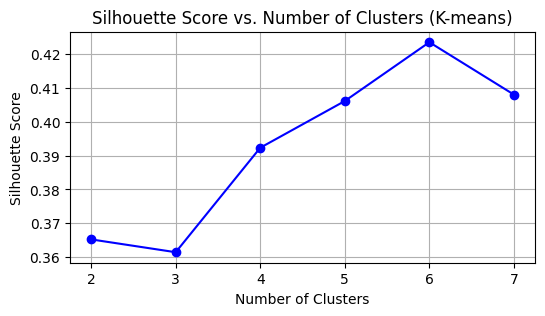

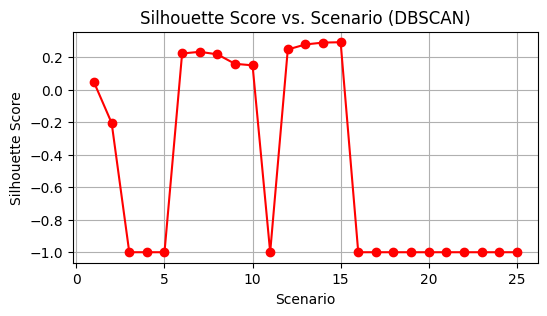

In [42]:

# Plot para K-means
plt.figure(figsize=(6, 3))
plt.plot(range(2, 8), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters (K-means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Plot para DBSCAN
plt.figure(figsize=(6, 3))
plt.plot(range(1, len(silhouette_scores_dbscan)+1), silhouette_scores_dbscan, marker='o', linestyle='-', color='r')
plt.title('Silhouette Score vs. Scenario (DBSCAN)')
plt.xlabel('Scenario')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

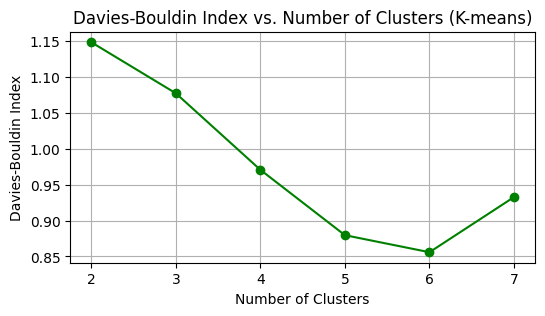

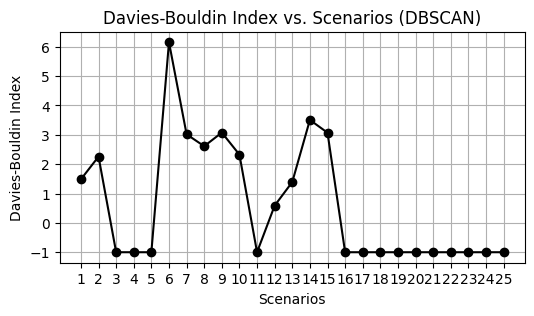

In [43]:
# Número de clusters para K-means
kmeans_clusters = range(2, 8)

# Plot para K-means
plt.figure(figsize=(6, 3))
plt.plot(kmeans_clusters, davies_bouldin_scores, marker='o', linestyle='-', color='g')
plt.title('Davies-Bouldin Index vs. Number of Clusters (K-means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(kmeans_clusters)
plt.grid(True)
plt.show()

# Número de cenários para DBSCAN
dbscan_scenarios = range(1, len(davies_bouldin_scores_dbscan) + 1)

# Plot para DBSCAN
plt.figure(figsize=(6, 3))
plt.plot(dbscan_scenarios, davies_bouldin_scores_dbscan, marker='o', linestyle='-', color='black')
plt.title('Davies-Bouldin Index vs. Scenarios (DBSCAN)')
plt.xlabel('Scenarios')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(dbscan_scenarios)
plt.grid(True)
plt.show()

#### Encontre o melhor clustering para cada um dos algoritmos selecionados

Agora que executou os algoritmos de clustering para diferentes combinações de parâmetros, indique os parâmetros que obtiveram os melhores resultados (segundo uma métrica escolhida por você) para cara um dos 2 algoritmos escolhidos.

In [44]:

# Melhores parâmetros para KMeans
best_kmeans_index = silhouette_scores.index(max(silhouette_scores))
best_kmeans_k = best_kmeans_index + 2  # +2 pois começamos com k=2
print(f"Melhor número de clusters para KMeans: {best_kmeans_k}")



# Melhores parâmetros para DBSCAN
best_dbscan_index = silhouette_scores_dbscan.index(max(silhouette_scores_dbscan))
best_dbscan_eps = [0.1, 0.2, 0.3, 0.4, 0.5][best_dbscan_index // 5]
best_dbscan_min_samples = [5, 10, 15, 20, 25][best_dbscan_index % 5]
print(f"Melhores parâmetros para DBSCAN: eps={best_dbscan_eps}, min_samples={best_dbscan_min_samples}")

#métrica escolhida: maior índice de silhueta



Melhor número de clusters para KMeans: 6
Melhores parâmetros para DBSCAN: eps=0.3, min_samples=25


#### Para cada algoritmo, visualize graficamente o modelo que teve o melhor desempenho.

Dica: Ao criar scatter plots, teste combinações de 2 variáveis da base que permita melhor visualização dos clusters. Para o clustering hierárquico, experimente plotar um dendrograma também.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


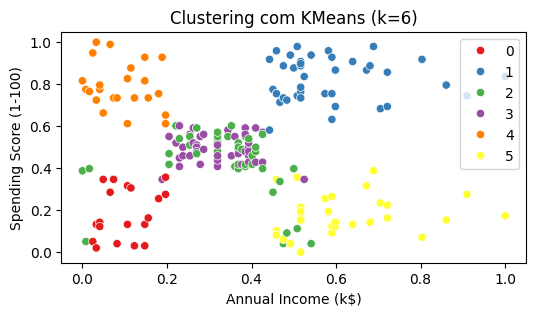

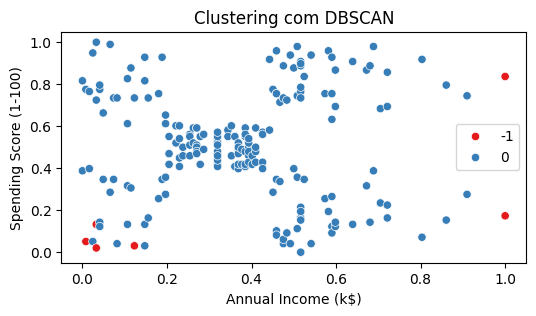

In [45]:
# Gráfico dos clusters para o melhor cenário do KMeans
best_kmeans = KMeans(n_clusters=best_kmeans_k, random_state=42)
best_kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=best_kmeans.labels_, palette='Set1', legend='full')
plt.title(f'Clustering com KMeans (k={best_kmeans_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Gráfico dos clusters para o melhor cenário do DBSCAN
best_dbscan = DBSCAN(eps=best_dbscan_eps, min_samples=best_dbscan_min_samples)
best_dbscan.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=best_dbscan.labels_, palette='Set1', legend='full')
plt.title('Clustering com DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()



#### Dentre os modelos visualizados graficamente, qual aparentou dividir os registros em clusters mais bem delimitados? Por que isso pode ter ocorrido?


O modelo KMeans aparentou dividir os registros em clusters mais bem delimitados, pois esse modelo funciona dividindo o espaço de características em regiões distintas, com cada cluster sendo representado por um centróide. Isso geralmente resulta em clusters bem definidos, já que cada ponto de dados é atribuído ao centróide mais próximo. Além disso, o DBSCAN tem influencia dos seus parâmetros, principalmente do eps (raio da vizinhança) e do min_samples (número mínimo de pontos em uma vizinhança para formar um cluster). Se esses parâmetros não estiverem bem ajustados, o DBSCAN pode produzir clusters menos definidos ou até mesmo agrupar todos os dados em um único cluster. O DBSCAN também atribui pontos aos clusters com base na densidade local, o que pode levar a clusters de forma mais irregular e menos definidos